# 1. Import libs

In [1]:
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Downloading DataSet

In [3]:
salaries = pd.read_csv("/kaggle/input/salary/ds_salaries.csv")

In [4]:
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# 2.1 About data

* work_year: The year the salary was paid.
* experience_level: The experience level in the job during the year
* employment_type: The type of employment for the role
* job_title: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid
* salaryinusd: The salary in USD
* employee_residence: Employee's primary country of residence
* remote_ratio: The overall amount of work done remotely
* company_location: The country of the employer's main office or contracting branch
* company_size: The median number of people that worked for the company during the year

In [5]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
#nulls quontity
salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Dataframe bilgisine göre tüm özellikler 3755 giriş (toplamda 3755 satır) içerdiğinden veri setinde eksik değer bulunmamaktadır.

Veri setinde eksik değerlerin olması durumunda, ortak yaklaşım, atamanın yapılması olacaktır. Sayısal özellikler için, eksik değerleri doldurmak amacıyla ortalama veya medyan atama uygulanabilirken, kategorik özellikler için mod (en sık görülen değer) kullanılabilir.

In [7]:
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


# 3. Data cleaning

In [8]:
## replasing abbreviations

experience_level = {
    "SE": "Senior",
    "MI": "Middle",
    "EN": "Entry",
    "EX": "Executive"
}
salaries["experience_level"] = salaries["experience_level"].replace(experience_level)

In [9]:
employment_type = {
    'FT': "Full-Time",
    'CT': "Contract",
    'FL': "Freelance",
    'PT': "Part-Time"
    }

salaries['employment_type'] = salaries['employment_type'].replace(employment_type)

In [10]:
company_size = {
    "L" :"Large",
    "M" :"Medium",
    "S" :"Small"
    }

salaries['company_size'] = salaries['company_size'].replace(company_size)

In [11]:
# Dropping columns 'salary' and 'salary_currency'
salaries = salaries.drop(columns=['salary', 'salary_currency'])

In [12]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-Time,Principal Data Scientist,85847,ES,100,ES,Large
1,2023,Middle,Contract,ML Engineer,30000,US,100,US,Small
2,2023,Middle,Contract,ML Engineer,25500,US,100,US,Small
3,2023,Senior,Full-Time,Data Scientist,175000,CA,100,CA,Medium
4,2023,Senior,Full-Time,Data Scientist,120000,CA,100,CA,Medium


# 4. Data visualization

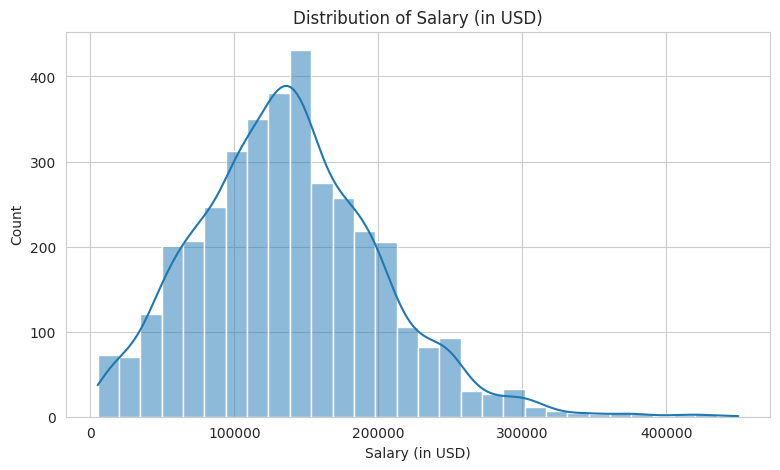

In [13]:
# Visualizing the distribution of salary_in_usd
sns.set_style("whitegrid")
# Initialize the figure
plt.figure(figsize=(20, 5))
# Plotting the distribution of salary_in_usd
plt.subplot(1, 2, 1)
sns.histplot(salaries['salary_in_usd'], kde=True, bins=30)
plt.title('Distribution of Salary (in USD)')
plt.xlabel('Salary (in USD)')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

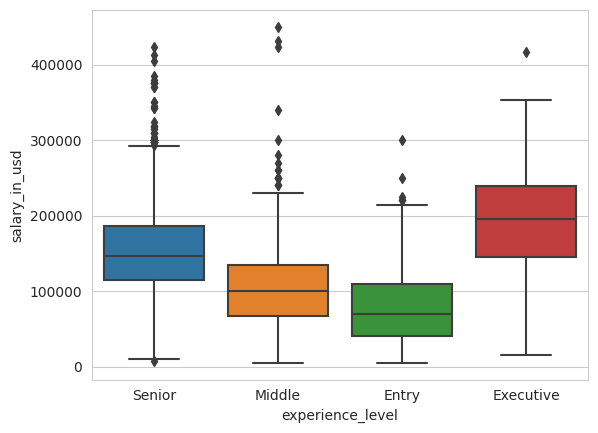

In [14]:
# Visualizing the distribution of experience_level
sns.boxplot( x=salaries["experience_level"], y=salaries["salary_in_usd"] )

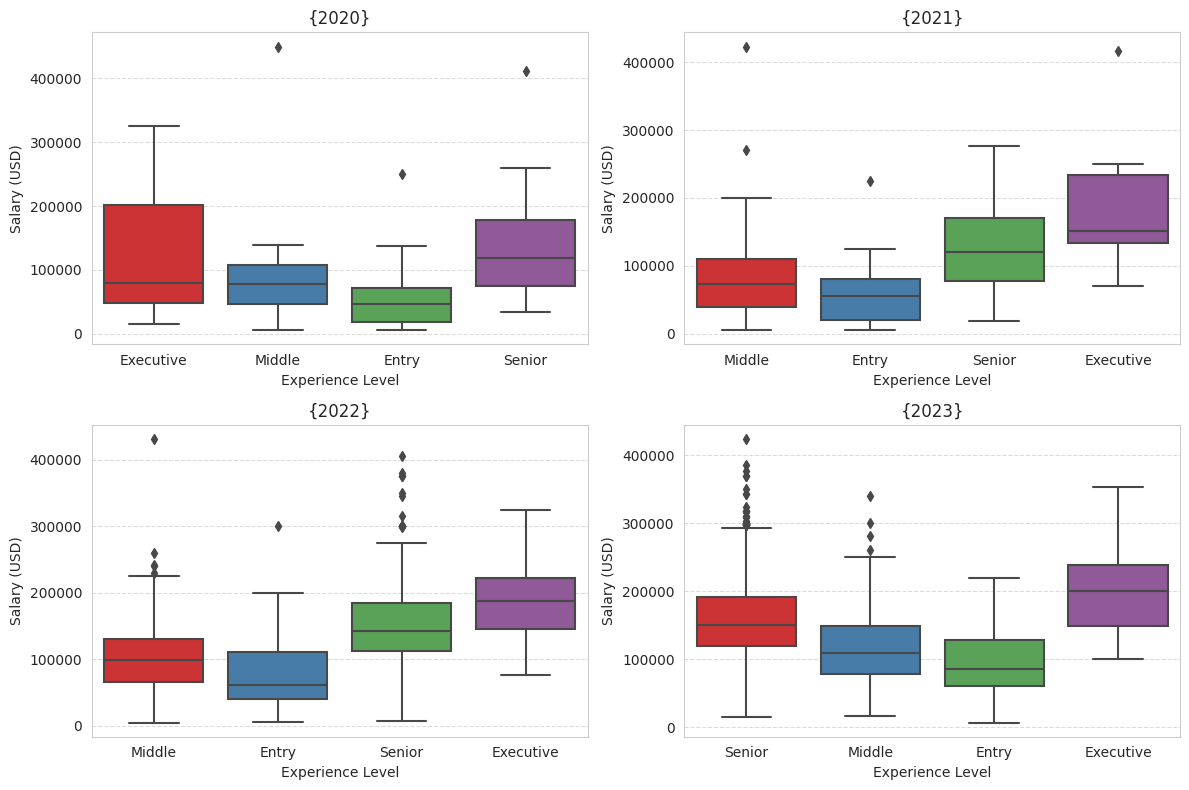

In [15]:
# Create a box plot to visualize salary distribution
years = salaries['work_year'].unique()
years.sort()

plt.figure(figsize=(12, 8))

for i, year in enumerate(years):
    year_data = salaries[salaries['work_year'] == year]
    
    # create a box plot
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=year_data, x='experience_level', y='salary_in_usd', palette='Set1')
    plt.title({year})
    plt.xlabel('Experience Level')
    plt.ylabel('Salary (USD)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

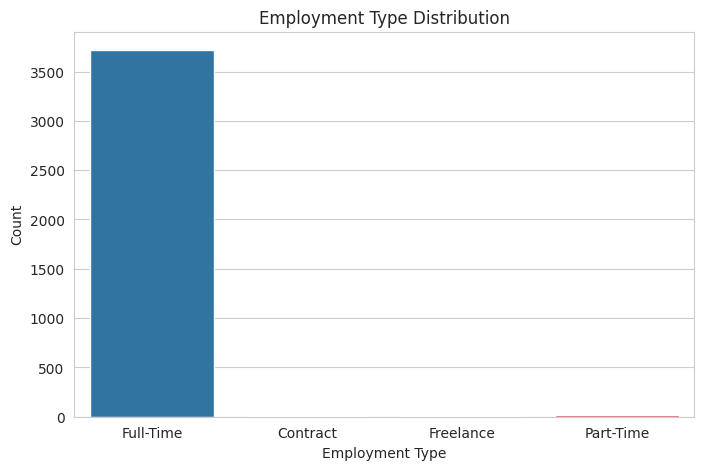

In [16]:
# Visualizing the distribution of  employment_type
plt.figure(figsize=(8, 5))
sns.countplot(data=salaries, x='employment_type')
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

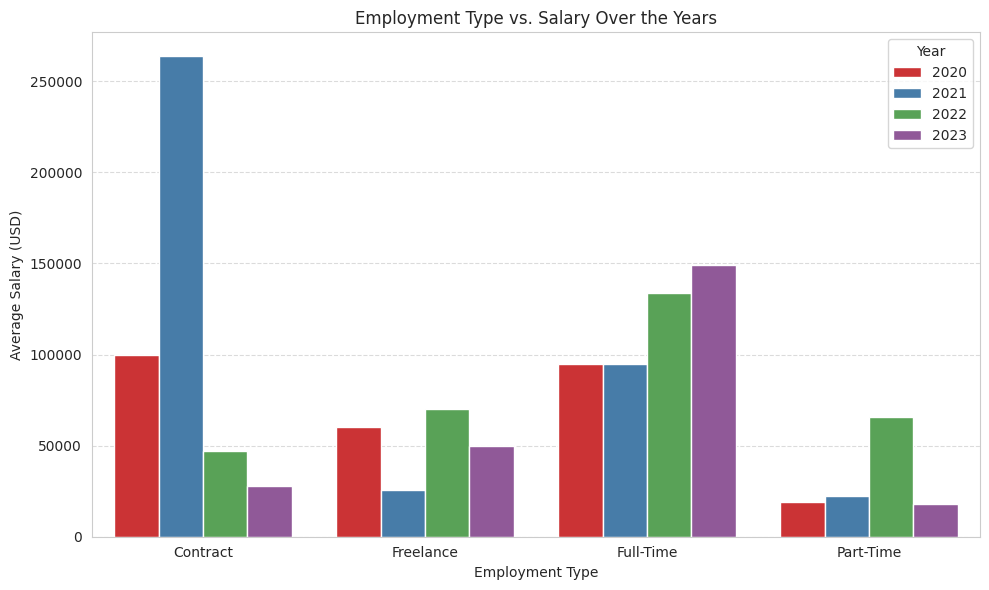

In [17]:
#Group data by years and employment type and average salary
salary_by_year_exp = salaries.groupby(['work_year', 'employment_type'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=salary_by_year_exp, x='employment_type', y='salary_in_usd', hue='work_year', palette='Set1')
plt.title('Employment Type vs. Salary Over the Years')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()


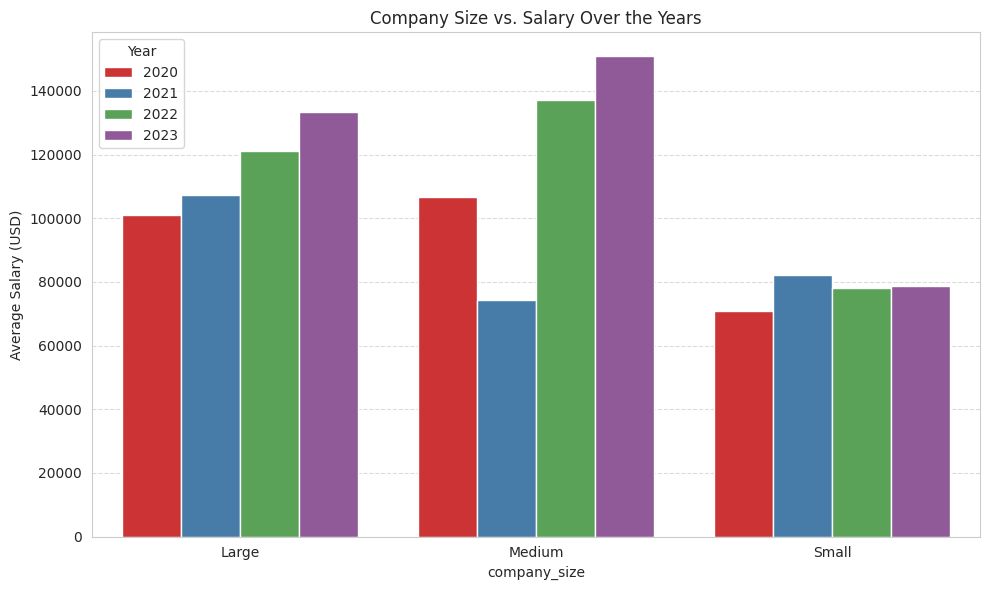

In [18]:
#Group data by years and company size and average salary
salary_by_year_exp = salaries.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=salary_by_year_exp, x='company_size', y='salary_in_usd', hue='work_year', palette='Set1')
plt.title('Company Size vs. Salary Over the Years')
plt.xlabel('company_size')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year', loc='upper left')
plt.tight_layout()
plt.show()

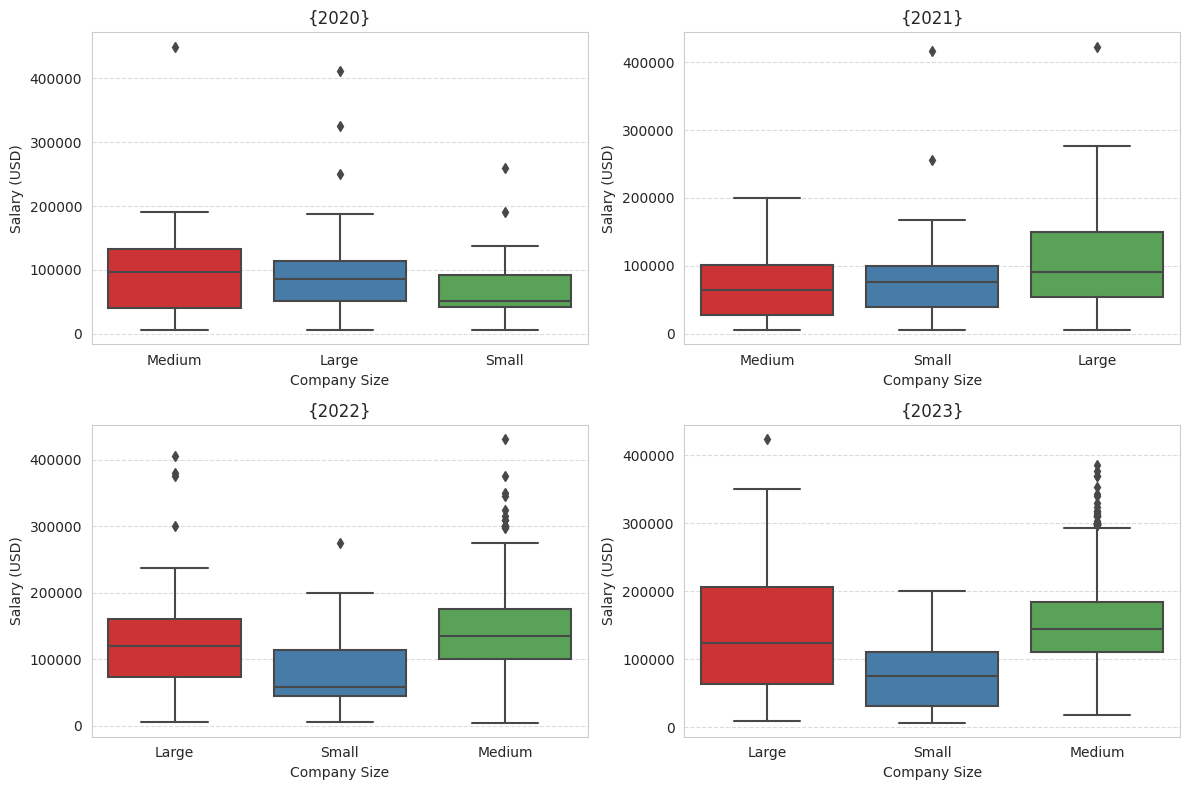

In [19]:
# Create a box plot to visualize salary distribution
years = salaries['work_year'].unique()
years.sort()

plt.figure(figsize=(12, 8))

for i, year in enumerate(years):
    
    year_data = salaries[salaries['work_year'] == year]
    
    # create a box plot
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=year_data, x='company_size', y='salary_in_usd', palette='Set1')
    plt.title({year})
    plt.xlabel('Company Size')
    plt.ylabel('Salary (USD)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

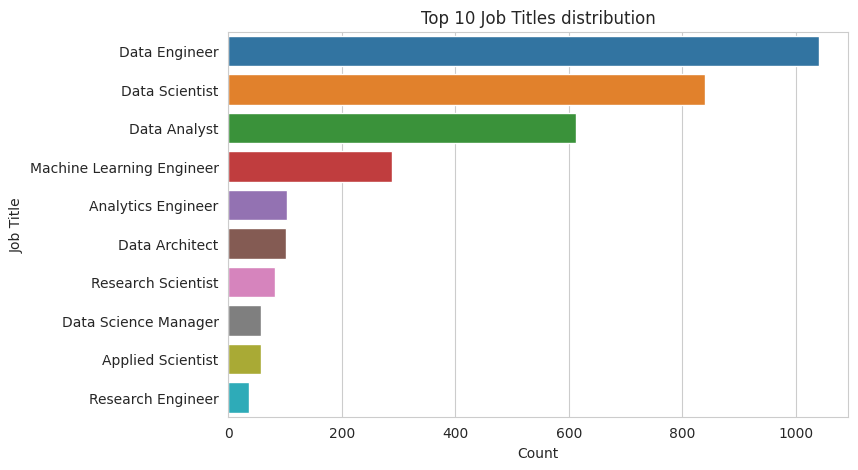

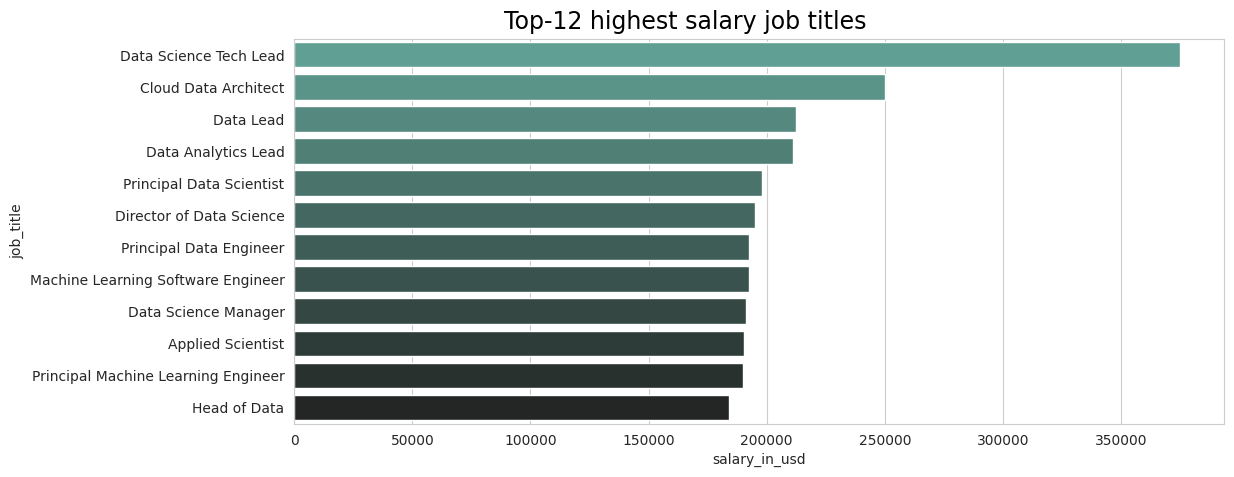

In [20]:
# Since there are many job titles, I'll just display the top 10 for clarity
plt.figure(figsize=(8, 5))
top_job_titles = salaries['job_title'].value_counts().head(10).index
sns.countplot(y='job_title', data=salaries, order=top_job_titles)
plt.title('Top 10 Job Titles distribution')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()
plt.figure(figsize=(12,5))

#Top-12 highest salary job titles
data = salaries.groupby('job_title').mean('numeric')['salary_in_usd'].reset_index().sort_values(by='salary_in_usd', ascending=False).head(12)

sns.barplot(y=data['job_title'], x=data['salary_in_usd'], palette='dark:#5A9_r')

sns.set(rc={'xtick.labelsize':10,
            'ytick.labelsize':10})

plt.gcf().text(.30, .90,       
               "Top-12 highest salary job titles",   
               fontsize = 17, 
               color='Black')
plt.show()


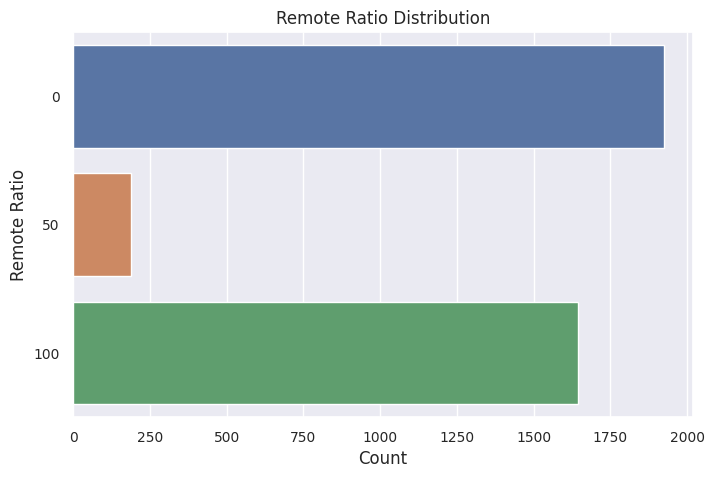

In [21]:
# Visualizing the distribution of remote_ratio
plt.figure(figsize=(8, 5))
sns.countplot(y='remote_ratio', data=salaries)
plt.title('Remote Ratio Distribution')
plt.xlabel('Count')
plt.ylabel('Remote Ratio')
plt.show()

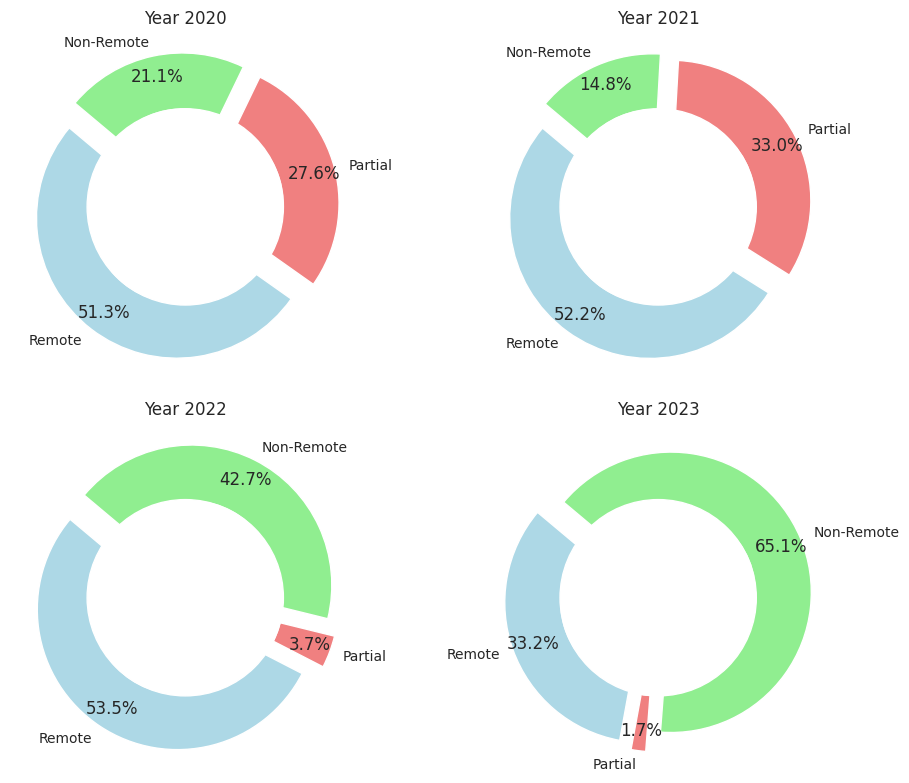

In [22]:
# Determine and sort the years
years = salaries['work_year'].unique()
years.sort()

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Create a donut chart for each year
for i, year in enumerate(years):
    year_data = salaries[salaries['work_year'] == year]
    
    # Calculate the counts of Remote, Partial, and Non-Remote employees
    remote_counts = year_data[year_data['remote_ratio'] == 100].shape[0]
    partial_counts = year_data[year_data['remote_ratio'] == 50].shape[0]
    non_remote_counts = year_data[year_data['remote_ratio'] == 0].shape[0]

    # Prepare data for the donut chart
    labels = ['Remote', 'Partial', 'Non-Remote']
    sizes = [remote_counts, partial_counts, non_remote_counts]
    colors = ['lightblue', 'lightcoral', 'lightgreen']
    explode = (0.1, 0.1, 0.1)  # Explode slices slightly

    # Create the donut chart
    ax = axes[i // 2, i % 2]  # Select the subplot
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
    
    # Draw the center circle (creating a donut chart)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)

    # Set a title for the subplot
    ax.set_title(f'Year {year}')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

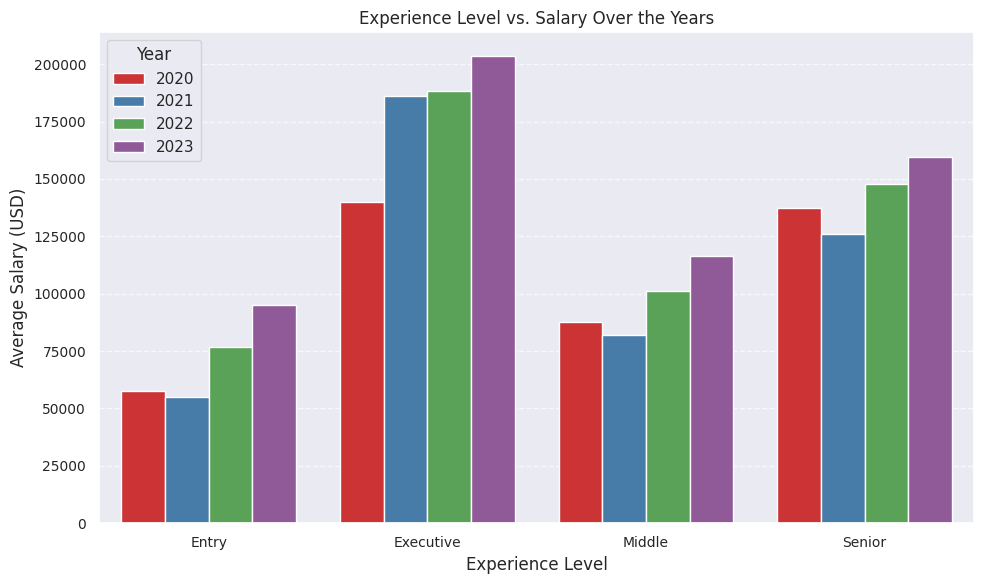

In [23]:
# Group data by years and experience level and average salary
salary_by_year_exp = salaries.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=salary_by_year_exp, x='experience_level', y='salary_in_usd', hue='work_year', palette='Set1')
plt.title('Experience Level vs. Salary Over the Years')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year', loc='upper left')
plt.tight_layout()
plt.show()

# 4.1 Exploratory Data Analysis
* # Beginner Level Question

In [24]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-Time,Principal Data Scientist,85847,ES,100,ES,Large
1,2023,Middle,Contract,ML Engineer,30000,US,100,US,Small
2,2023,Middle,Contract,ML Engineer,25500,US,100,US,Small
3,2023,Senior,Full-Time,Data Scientist,175000,CA,100,CA,Medium
4,2023,Senior,Full-Time,Data Scientist,120000,CA,100,CA,Medium


In [25]:
#Deneyim seviyesine göre ortalama maaş nedir? --1
senior_salaries = salaries[salaries["experience_level"] == "Senior"]["salary_in_usd"].mean()
executive_salaries = salaries[salaries["experience_level"] == "Executive"]["salary_in_usd"].mean()
middle_salaries = salaries[salaries["experience_level"] == "Middle"]["salary_in_usd"].mean()
entry_salaries = salaries[salaries["experience_level"] == "Entry"]["salary_in_usd"].mean()
print("Senior salary average:",senior_salaries,"\nExecutive salary average:",executive_salaries,"\nMiddle salary average:",middle_salaries,"\nEntry salary average:",entry_salaries)

Senior salary average: 153051.07154213038 
Executive salary average: 194930.9298245614 
Middle salary average: 104525.93913043478 
Entry salary average: 78546.284375


In [26]:
#İş türlerine göre ortalama maaş nedir? --2
average_salary_by_job = salaries.groupby("job_title")["salary_in_usd"].mean()
print(average_salary_by_job)

job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64


In [27]:
#Uzaktan çalışma oranı ile maaş arasındaki ilişki nedir? --3
full_remote = salaries[salaries["remote_ratio"] == 100]["salary_in_usd"].mean()
partial = salaries[salaries["remote_ratio"] == 50]["salary_in_usd"].mean()
non_remote = salaries[salaries["remote_ratio"] == 0]["salary_in_usd"].mean()
print("Full remote salary avarage:",full_remote,"\nPartial salary avarage:",partial,"\nNon remote salary avarage",non_remote)

Full remote salary avarage: 136481.45283018867 
Partial salary avarage: 78400.68783068784 
Non remote salary avarage 144316.20228809153


In [28]:
#Şirket büyüklüğü ile maaş arasında bir bağlantı var mıdır? --4
large_company = salaries[salaries["company_size"] == "Large"]["salary_in_usd"].mean()
medium_company = salaries[salaries["company_size"] == "Medium"]["salary_in_usd"].mean()
small_company = salaries[salaries["company_size"] == "Small"]["salary_in_usd"].mean()
print("Large company salary avarage:",large_company,"\nMedium company salary avarage:",medium_company,"\nSmall company salary avarage",small_company)

Large company salary avarage: 118300.98237885462 
Medium company salary avarage: 143130.54836663496 
Small company salary avarage 78226.68243243243


In [29]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-Time,Principal Data Scientist,85847,ES,100,ES,Large
1,2023,Middle,Contract,ML Engineer,30000,US,100,US,Small
2,2023,Middle,Contract,ML Engineer,25500,US,100,US,Small
3,2023,Senior,Full-Time,Data Scientist,175000,CA,100,CA,Medium
4,2023,Senior,Full-Time,Data Scientist,120000,CA,100,CA,Medium


In [30]:
#Hangi iş pozisyonları en yüksek maaşları sunuyor? --5
average_salary_by_country = salaries.groupby("job_title")["salary_in_usd"].mean()
highest_paying_country = average_salary_by_country.idxmax()
highest_salary = average_salary_by_country.max()
print("En yüksek ortalama maaşı sunan pozisyon:", highest_paying_country)
print("Ortalama maaş:", highest_salary)

En yüksek ortalama maaşı sunan pozisyon: Data Science Tech Lead
Ortalama maaş: 375000.0


In [31]:
#Uzaktan çalışmayan ve  GB(United Kingdom) ülkesinde bulunan kaç tane şirket vardır? --6

non_remote = len(salaries[(salaries["remote_ratio"] == 0) & (salaries["company_location"] == "GB")])
print(non_remote)

90


In [32]:
#Hangi iş unvanları(top 5) en yüksek maaşları sunuyor? --7
average_salary_by_job_title = salaries.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False)
average_salary_by_job_title.head(5)

job_title
Data Science Tech Lead      375000.000
Cloud Data Architect        250000.000
Data Lead                   212500.000
Data Analytics Lead         211254.500
Principal Data Scientist    198171.125
Name: salary_in_usd, dtype: float64

In [33]:
#Çalışanların çoğunluğu hangi ülkelerde ikamet etmektedir? --8
salaries["employee_residence"].value_counts().index[0]

'US'

In [34]:
#İş pozisyonlarının çoğunluğu hangi ülkelerden gelmektedir? --9
salaries["company_location"].value_counts().head()

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
Name: count, dtype: int64

In [35]:
#Hangi iş unvanlarının uzaktan çalışma olanağı sunuyor? --10
def has_remote_opportunity(remote_ratio):
    return remote_ratio == 100

remote_opportunity_jobs = salaries[salaries["remote_ratio"].apply(has_remote_opportunity)]["job_title"]

print("Uzaktan çalışma olanağı sunan iş unvanları:")
print(remote_opportunity_jobs.unique())

Uzaktan çalışma olanağı sunan iş unvanları:
['Principal Data Scientist' 'ML Engineer' 'Data Scientist' 'Data Analyst'
 'Analytics Engineer' 'Data Quality Analyst' 'Compliance Data Analyst'
 'Data Engineer' 'Data Architect' 'Machine Learning Engineer'
 'Applied Machine Learning Engineer' 'Applied Data Scientist'
 'ETL Engineer' 'AI Developer' 'Research Scientist' 'Applied Scientist'
 'Data Manager' 'Big Data Engineer' 'Data Analytics Manager'
 'BI Data Engineer' 'MLOps Engineer' 'Lead Data Scientist'
 'Cloud Database Engineer' 'Applied Machine Learning Scientist'
 'Financial Data Analyst' 'Data Infrastructure Engineer'
 'Software Data Engineer' 'Data Operations Engineer' 'BI Developer'
 'Data Science Lead' 'Business Data Analyst' 'Head of Data'
 'Data Science Manager' 'BI Data Analyst' 'Research Engineer'
 'Deep Learning Engineer' 'Machine Learning Infrastructure Engineer'
 'Big Data Architect' 'Machine Learning Software Engineer'
 'Product Data Analyst' 'Computer Vision Software Engine

* # Intermediate Level Question

In [36]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-Time,Principal Data Scientist,85847,ES,100,ES,Large
1,2023,Middle,Contract,ML Engineer,30000,US,100,US,Small
2,2023,Middle,Contract,ML Engineer,25500,US,100,US,Small
3,2023,Senior,Full-Time,Data Scientist,175000,CA,100,CA,Medium
4,2023,Senior,Full-Time,Data Scientist,120000,CA,100,CA,Medium


In [37]:
#Hangi yılda ne kadar çalışan bulunmaktadır? --1
salaries["work_year"].value_counts().sort_index()

work_year
2020      76
2021     230
2022    1664
2023    1785
Name: count, dtype: int64

In [38]:
#İş pozisyonlarında uzaktan çalışma oranı hangi yılda en yüksektir? --2
salaries[salaries["remote_ratio"] == 100]["work_year"].value_counts().idxmax()

2022

In [39]:
# Hangi ülkede en yüksek salary_in_usd değerine sahip şirket bulunmaktadır? - 3
max_salary = salaries["salary_in_usd"].max()
company_location_with_highest_salary = salaries[salaries["salary_in_usd"] == max_salary]["company_location"].values[0]
print(f"En yüksek maaşa sahip şirketin bulunduğu ülke: {company_location_with_highest_salary}")

En yüksek maaşa sahip şirketin bulunduğu ülke: US


Correlation Coefficient: -0.06417098519057558
Average Salary for Remote Work Ratio 50% and Above: $130489.50
Average Salary for Remote Work Ratio Below 50%: $144316.20


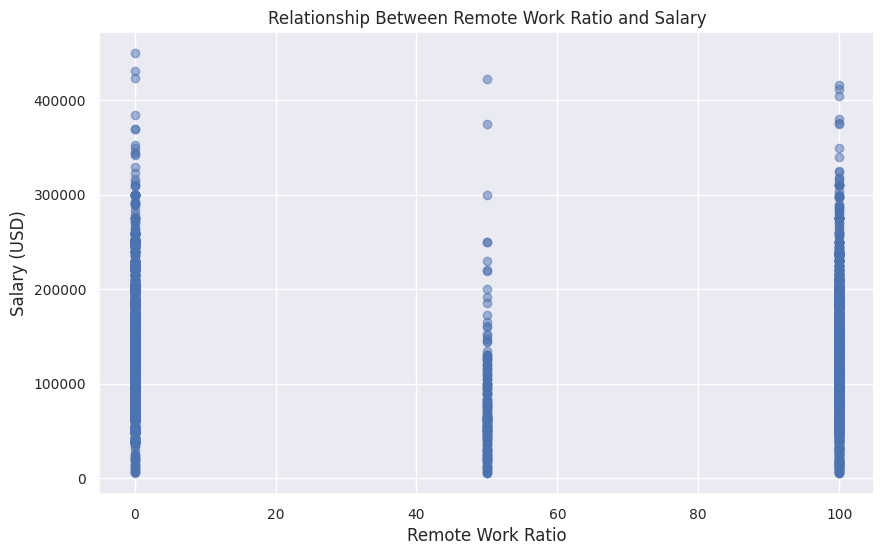

In [40]:
#Uzaktan çalışma oranı ile maaş arasında bir ilişki var mıdır? Hangi seviyedeki uzaktan çalışma daha yüksek maaşlarla ilişkilendirilebilir? --4

# Visualize the relationship between remote work ratio and salary
plt.figure(figsize=(10, 6))
plt.scatter(salaries['remote_ratio'], salaries['salary_in_usd'], alpha=0.5)
plt.title('Relationship Between Remote Work Ratio and Salary')
plt.xlabel('Remote Work Ratio')
plt.ylabel('Salary (USD)')

# Calculate the correlation coefficient
correlation = salaries['remote_ratio'].corr(salaries['salary_in_usd'])
print(f"Correlation Coefficient: {correlation}")

# You can split the remote work ratio based on a specific threshold and compare salaries between groups.
threshold = 50  # For example, a 50% threshold
above_threshold = salaries[salaries['remote_ratio'] >= threshold]['salary_in_usd']
below_threshold = salaries[salaries['remote_ratio'] < threshold]['salary_in_usd']

# Calculate the average salaries for those above and below the remote work ratio threshold
average_salary_above = above_threshold.mean()
average_salary_below = below_threshold.mean()

print(f"Average Salary for Remote Work Ratio {threshold}% and Above: ${average_salary_above:.2f}")
print(f"Average Salary for Remote Work Ratio Below {threshold}%: ${average_salary_below:.2f}")

# Show the plots
plt.show()

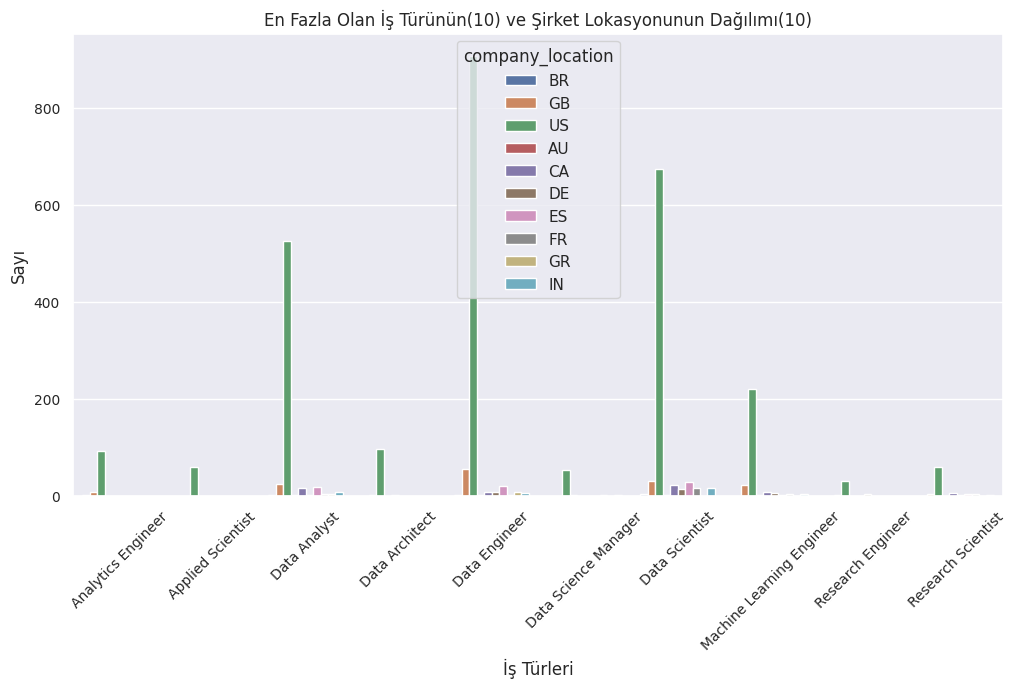

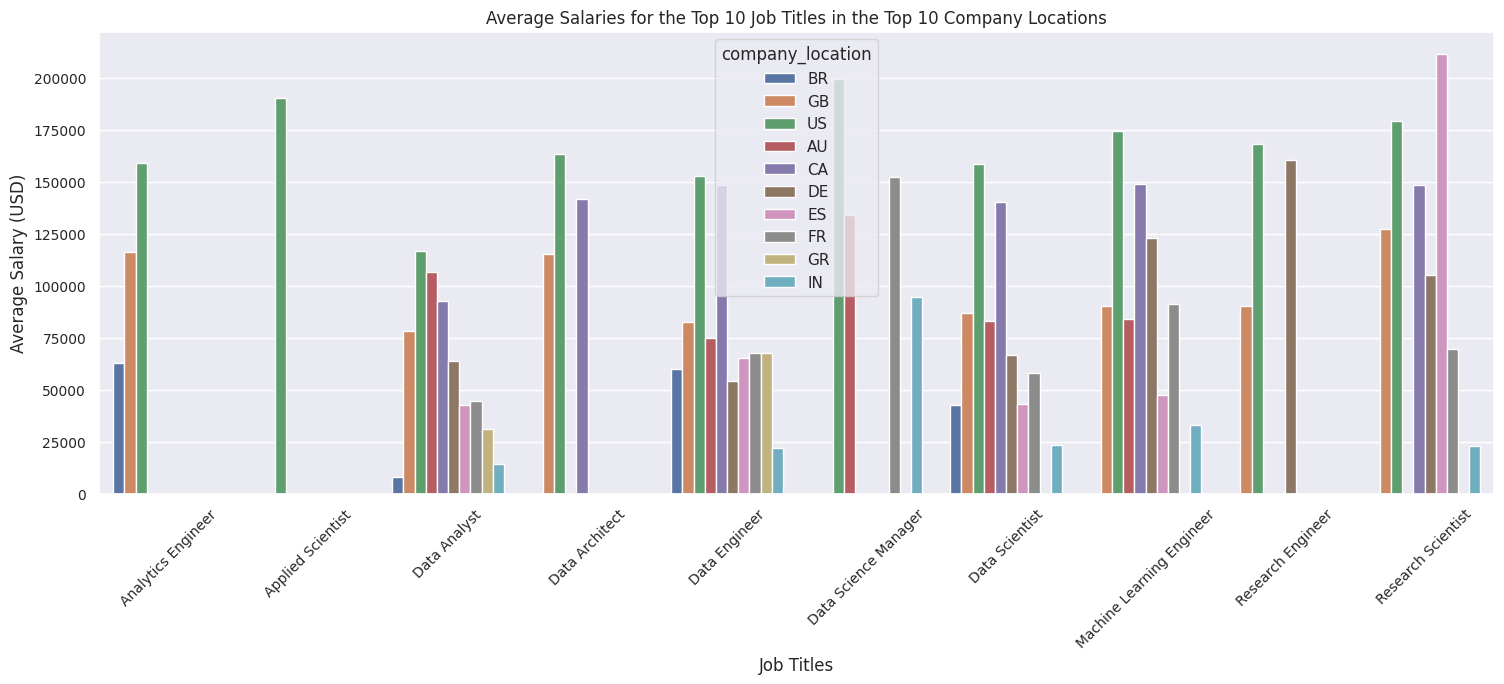

In [41]:
#Hangi iş türleri, hangi bölgelerde daha yaygındır ve bu bölgelerdeki işlerin ortalama maaşı nedir? --5

# Select the top 10 job titles and top 10 company locations
top_10_job_titles = salaries['job_title'].value_counts().head(10).index
top_10_company_locations = salaries['company_location'].value_counts().head(10).index

# Filter the data for the selected job titles and company locations
filtered_salaries = salaries[(salaries['job_title'].isin(top_10_job_titles)) & (salaries['company_location'].isin(top_10_company_locations))]

# Calculate the distribution of job titles and company locations
job_location_distribution = filtered_salaries.groupby(['job_title', 'company_location']).size().reset_index(name='count')

# Calculate average salaries
average_salaries = filtered_salaries.groupby(['job_title', 'company_location'])['salary_in_usd'].mean().reset_index(name='avg_salary')

# Merge the two dataframes
merged_data = pd.merge(job_location_distribution, average_salaries, on=['job_title', 'company_location'])

plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='count', hue='company_location', data=merged_data)
plt.title('En Fazla Olan İş Türünün(10) ve Şirket Lokasyonunun Dağılımı(10)')
plt.xlabel('İş Türleri')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
# Create a figure with a larger size
plt.figure(figsize=(18, 6))

# Plot the average salaries of the top 10 job titles in the top 10 company locations
sns.barplot(x='job_title', y='avg_salary', hue='company_location', data=merged_data)
plt.title('Average Salaries for the Top 10 Job Titles in the Top 10 Company Locations')
plt.xlabel('Job Titles')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)

plt.show()

In [42]:
# Şirket Yeri Türkiyede olan herhangi bir pozisyonun maaşındaki değişimi yorumlayınız. --6
salaries[(salaries["company_location"] == "TR") & (salaries["experience_level"] == "Middle")].groupby("work_year")["salary_in_usd"].mean().reset_index()

,work_year,salary_in_usd
0,2021,20059.5
1,2022,17500.0


In [43]:
#Hangi meslek grupları ortalamanın üzerinde maaşa sahiptir? --7
average_salary  = salaries["salary_in_usd"].mean()
above_average_salaries = salaries[salaries["salary_in_usd"] > average_salary]
above_average_job_titles = above_average_salaries["job_title"].unique()
print("Ortalamanın üzerinde maaşa sahip olan meslek grupları:")
for job_title in above_average_job_titles:
    print(job_title)
print("Toplam çıktı sayısı:", len(above_average_job_titles))
num_unique_job_titles = salaries["job_title"].nunique()
print("Toplam meslek grubu sayısı:", num_unique_job_titles)

Ortalamanın üzerinde maaşa sahip olan meslek grupları:
Data Scientist
Applied Scientist
Data Modeler
Data Analyst
Research Engineer
Analytics Engineer
Business Intelligence Engineer
Machine Learning Engineer
Data Engineer
Computer Vision Engineer
Data Architect
AI Developer
Research Scientist
Data Analytics Manager
Head of Data
Data Science Manager
Data Manager
Director of Data Science
Machine Learning Scientist
AI Scientist
Lead Data Scientist
Cloud Database Engineer
Data Infrastructure Engineer
ML Engineer
Data Operations Engineer
Data Science Lead
BI Analyst
Machine Learning Infrastructure Engineer
Head of Data Science
Deep Learning Engineer
Machine Learning Software Engineer
Big Data Architect
BI Developer
Data Science Consultant
Data Lead
Data Science Engineer
NLP Engineer
Applied Machine Learning Scientist
Principal Machine Learning Engineer
Machine Learning Researcher
Data Specialist
Data Science Tech Lead
Marketing Data Analyst
Big Data Engineer
Machine Learning Manager
ETL Dev

In [44]:
#ABD'deki Orta ölçekli şirketlerde Giriş Seviyesi/Junior pozisyonları için en yüksek ücretli işlerin ortalama maaşları nedir? --8

filtered_salaries = salaries[(salaries["company_location"] == "US") & (salaries["company_size"] == "Medium") & (salaries["experience_level"] == "Entry")]

# Ortalama maaşları gruplayarak hesaplayın
average_salary = filtered_salaries["salary_in_usd"].mean()

print("ABD'deki orta ölçekli şirketlerde giriş seviyesi pozisyonları için en yüksek ücretli işlerin ortalama maaşı:", average_salary, "USD")

ABD'deki orta ölçekli şirketlerde giriş seviyesi pozisyonları için en yüksek ücretli işlerin ortalama maaşı: 104835.26016260163 USD


In [45]:
#Hangi ülkede yer alan şirketler en yüksek ortalama salary_in_usd değerine sahiptir? --9
average_salary_by_country = salaries.groupby("company_location")["salary_in_usd"].mean()
highest_average_salary_country = average_salary_by_country.idxmax()
highest_average_salary_value = average_salary_by_country.max()
print(f"{highest_average_salary_country} ülkesindeki şirketler en yüksek ortalama salary_in_usd değerine sahiptir: {highest_average_salary_value}")

IL ülkesindeki şirketler en yüksek ortalama salary_in_usd değerine sahiptir: 271446.5


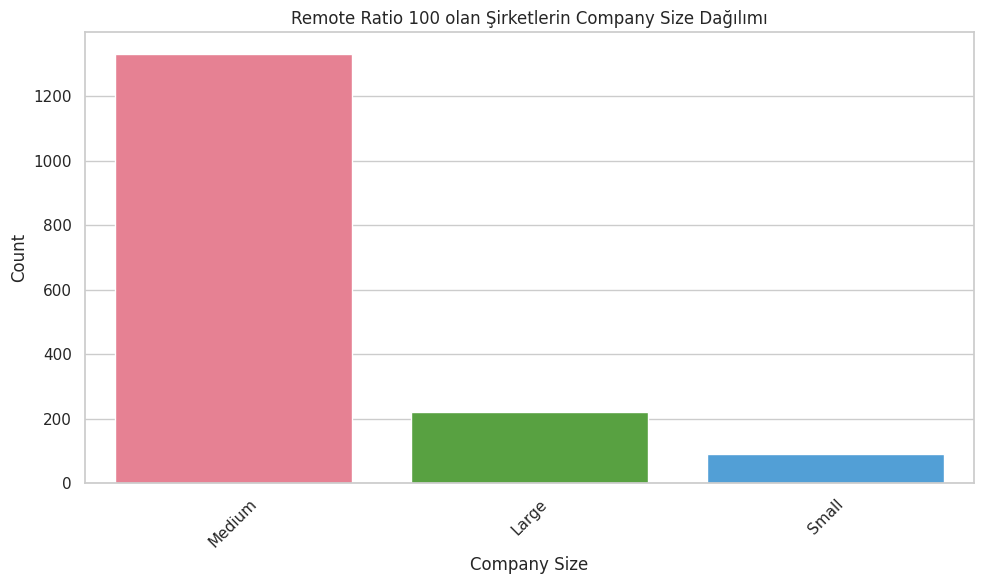

In [46]:
#Uzaktan çalışan şirketlerin şirket büyüklük dağılımını gösteren bir grafik --10
remote_ratio_100_companies = salaries[salaries["remote_ratio"] == 100]["company_size"]

company_size_counts = remote_ratio_100_companies.value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=company_size_counts.index, y=company_size_counts.values, palette="husl")
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.title("Remote Ratio 100 olan Şirketlerin Company Size Dağılımı")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# 5.Modelling

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-Time,Principal Data Scientist,85847,ES,100,ES,Large
1,2023,Middle,Contract,ML Engineer,30000,US,100,US,Small
2,2023,Middle,Contract,ML Engineer,25500,US,100,US,Small
3,2023,Senior,Full-Time,Data Scientist,175000,CA,100,CA,Medium
4,2023,Senior,Full-Time,Data Scientist,120000,CA,100,CA,Medium


In [49]:
salaries['experience_level'] = le.fit_transform(salaries['experience_level'])
salaries['experience_level'].unique() 

array([3, 2, 0, 1])

In [50]:
salaries['employment_type'] = le.fit_transform(salaries['employment_type'])
salaries['employment_type'].unique() 

array([2, 0, 1, 3])

In [51]:
salaries['job_title'] = le.fit_transform(salaries['job_title'])
salaries['job_title'].unique() 

array([84, 66, 47,  8, 25, 38, 88,  4, 18, 69, 50, 33, 23, 41, 22, 31,  6,
        1, 89, 29, 17,  5, 91, 55, 32, 58, 45, 37, 73, 16, 49, 62, 13, 53,
       74, 67,  3,  9,  7, 64, 21, 57, 34, 90,  2, 40, 14, 44, 52, 11, 42,
       30, 70, 12, 59, 61, 51, 75, 15, 86, 24, 10, 78, 28, 35, 43, 72, 79,
       76, 68,  0, 85, 27, 26, 36, 46, 48, 20, 39, 77, 80, 87, 82, 71, 65,
       54, 19, 63, 60, 81, 83, 92, 56])

In [52]:
salaries['employee_residence'] = le.fit_transform(salaries['employee_residence'])
salaries['employee_residence'].unique() 

array([26, 75, 11, 20, 29, 56, 39, 32, 63, 57, 13, 12, 28,  5, 27, 74, 37,
       38, 30,  4, 16, 68, 67, 69, 54, 76, 10, 71, 34, 61, 46, 77, 18,  2,
        1,  6, 45, 31, 52, 49, 64, 60, 42, 50, 47,  7,  3, 41, 35, 70, 15,
       19, 17, 73, 14, 62, 21,  9, 59, 22, 25, 36,  0, 55, 44, 24, 33, 72,
       66, 23, 40,  8, 43, 65, 58, 51, 48, 53])

In [53]:
salaries['remote_ratio'] = le.fit_transform(salaries['remote_ratio'])
salaries['remote_ratio'].unique() 

array([2, 0, 1])

In [54]:
salaries['company_location'] = le.fit_transform(salaries['company_location'])
salaries['company_location'].unique() 

array([25, 70, 12, 20, 28, 53, 38, 31, 54, 14, 13, 27, 26, 69, 36, 37, 29,
       17, 64,  6, 63, 65, 51, 10, 60, 62, 67, 33, 71, 23,  2,  7, 43, 30,
       49, 46, 61, 57, 41, 47, 58,  1,  3, 44,  4, 18, 40, 11, 34,  5, 66,
       19, 68, 59, 21,  9, 56,  8, 35, 24,  0, 45, 52, 32, 42, 22, 39, 16,
       55, 15, 48, 50])

In [55]:
salaries['company_size'] = le.fit_transform(salaries['company_size'])
salaries['company_size'].unique() 

array([0, 2, 1])

<Axes: >

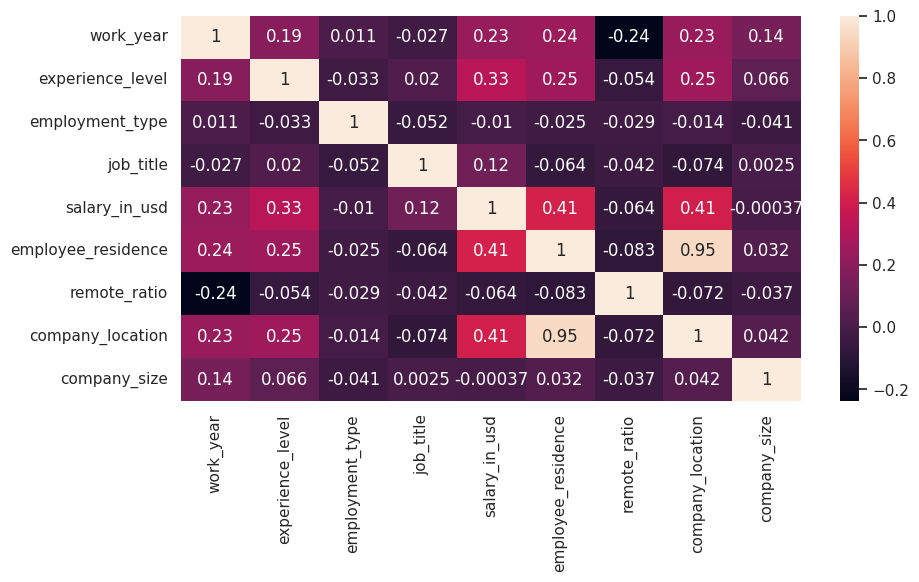

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(salaries.corr(), annot=True) 

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
salaries[['salary_in_usd']] = scaler.fit_transform(salaries[['salary_in_usd']])

In [58]:
from sklearn.model_selection import train_test_split
X = salaries.drop(['salary_in_usd'], axis = 1)
y = salaries['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting test data using model
y_pred = model.predict(X_test)

In [61]:
y_pred

array([-0.6639173 ,  0.28391664,  0.28778175, ...,  0.61726034,
       -1.48693884,  0.25729497])

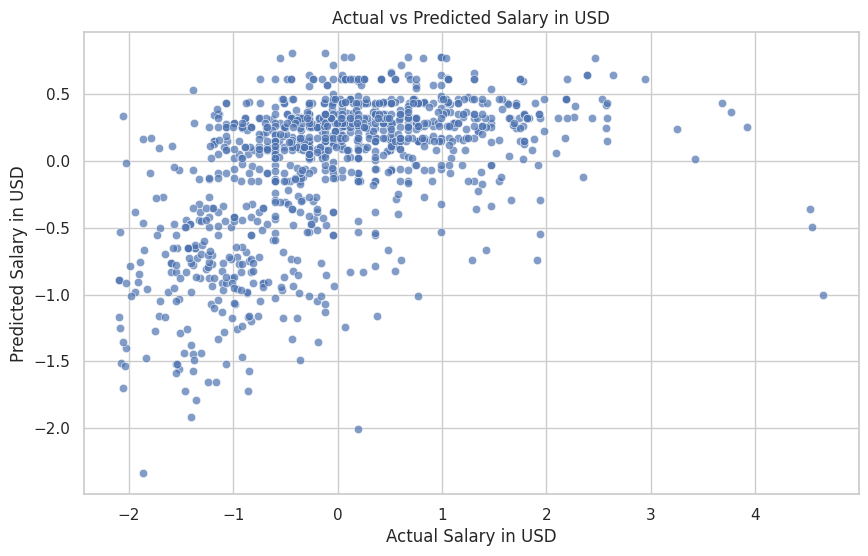

In [62]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel('Actual Salary in USD')
plt.ylabel('Predicted Salary in USD')
plt.title('Actual vs Predicted Salary in USD')
plt.grid(True)
plt.show()

In [63]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R^2 score)
r2 = r2_score(y_test, y_pred)

print(f'MSE = {mse},\nR^2 score = {r2}')

MSE = 0.7495983271951991,
R^2 score = 0.24845872226932852


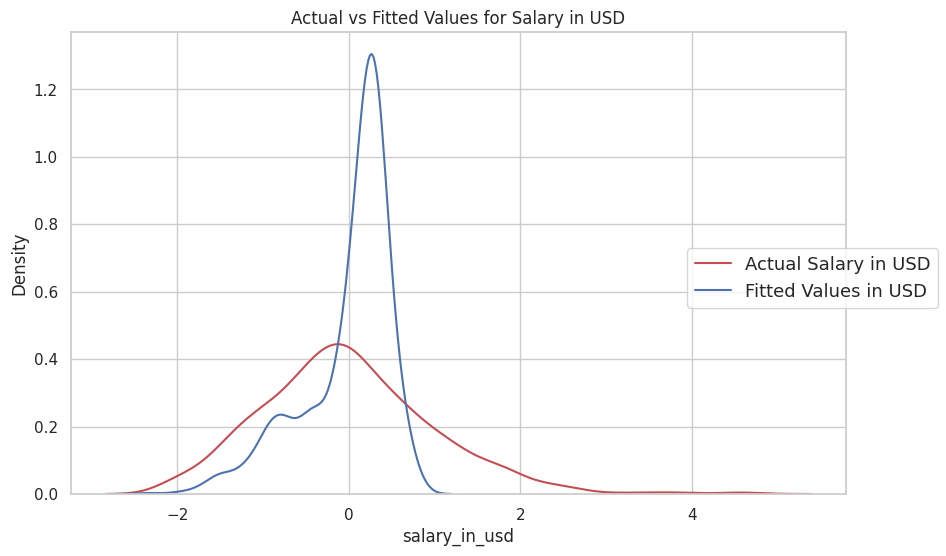

In [64]:
ax, fig = plt.subplots(figsize= (10,6))
sns.kdeplot(y_test, color="r", label='Actual Salary in USD')
sns.kdeplot(y_pred, color="b", label='Fitted Values in USD')


plt.title('Actual vs Fitted Values for Salary in USD')
ax.legend(loc='center right', fontsize=13)

plt.show()

In [65]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=420)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Use the model to make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate the mean squared error
rf_mse = mean_squared_error(y_test, rf_y_pred)

# Calculate the coefficient of determination (R^2 score)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f'MSE = {rf_mse},\nR^2 score = {rf_r2}')

MSE = 0.6436163286312475,
R^2 score = 0.3547154249960158


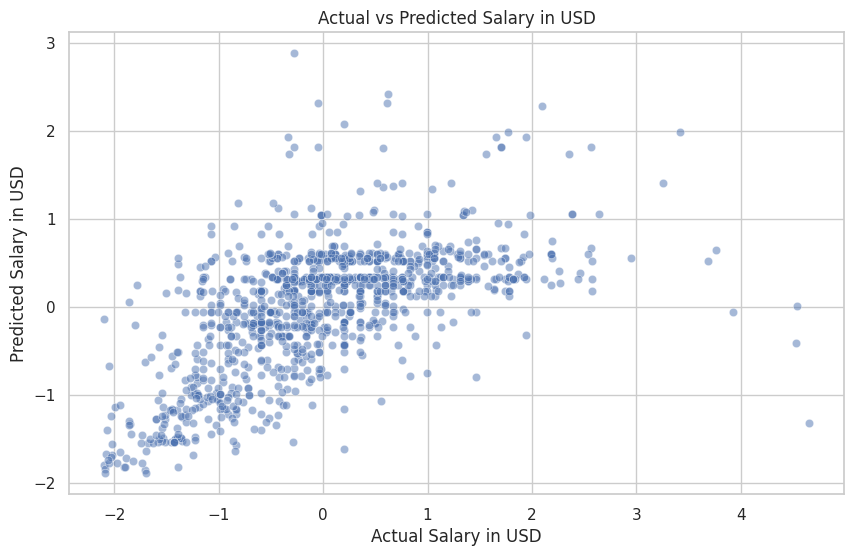

In [66]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=rf_y_pred, alpha=0.5)

plt.xlabel('Actual Salary in USD')
plt.ylabel('Predicted Salary in USD')
plt.title('Actual vs Predicted Salary in USD')

plt.grid(True)
plt.show()

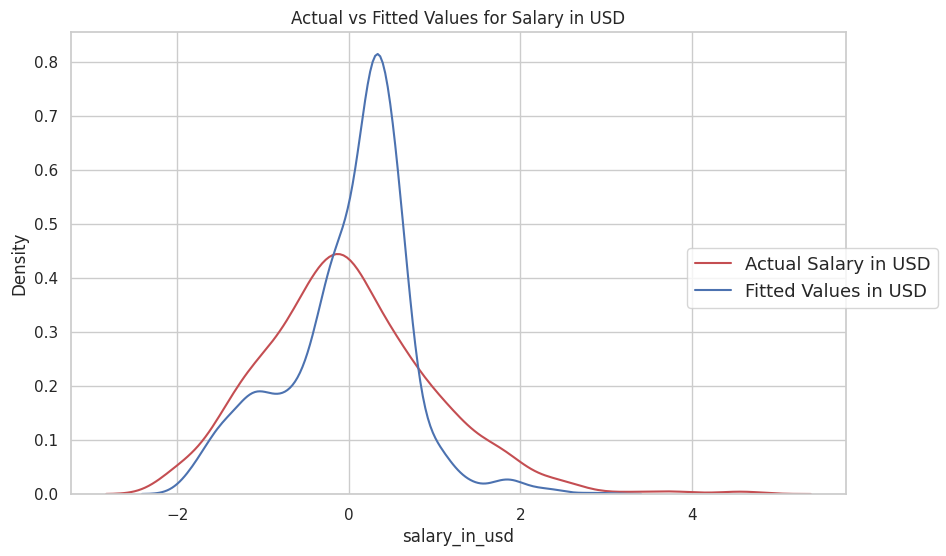

In [67]:
ax, fig = plt.subplots(figsize= (10,6))

sns.kdeplot(y_test, color="r", label='Actual Salary in USD')
sns.kdeplot(rf_y_pred, color="b", label='Fitted Values in USD')


plt.title('Actual vs Fitted Values for Salary in USD')
ax.legend(loc='center right', fontsize=13)

plt.show()

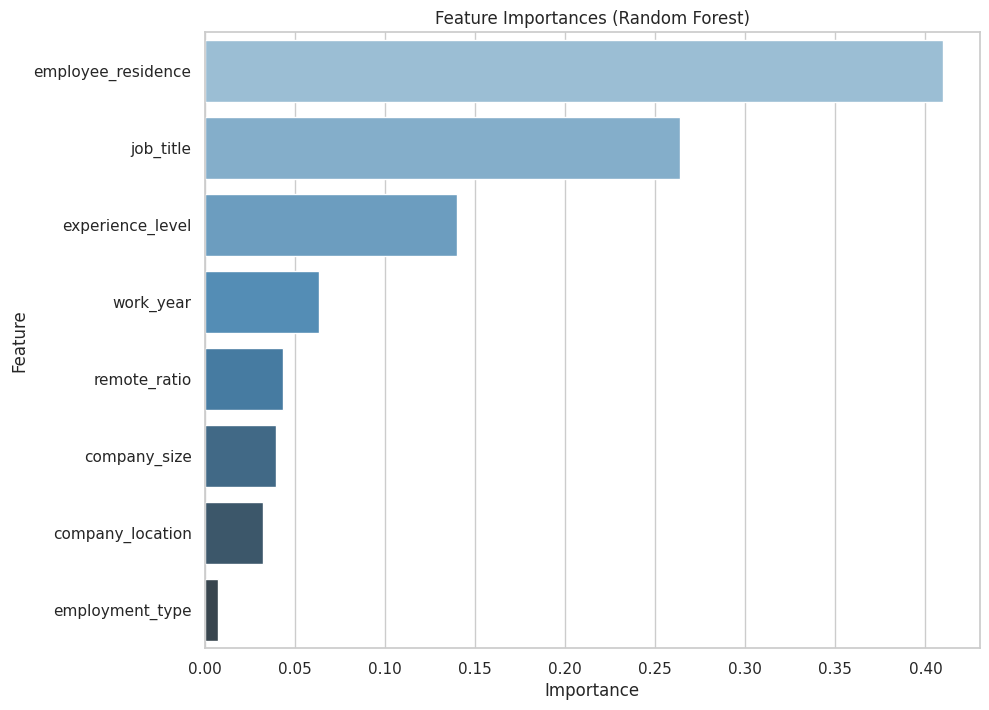

In [68]:
# Get feature importances from the random forest model
importances = rf_model.feature_importances_

# Create a dataframe for visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the dataframe by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette="Blues_d")
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [69]:
from sklearn.tree import DecisionTreeRegressor

# Initialize a DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=420)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Use the model to make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Calculate the mean squared error
dt_mse = mean_squared_error(y_test, dt_y_pred)

# Calculate the coefficient of determination (R^2 score)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f'MSE = {dt_mse},\nR^2 score = {dt_r2}')

MSE = 0.7401042498820336,
R^2 score = 0.25797740812540315


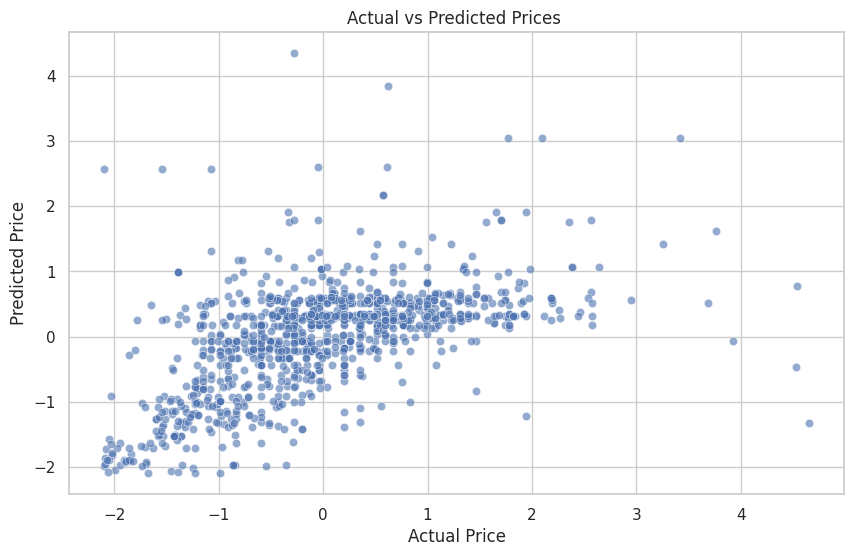

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=dt_y_pred, alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices ')
plt.grid(True)
plt.show()

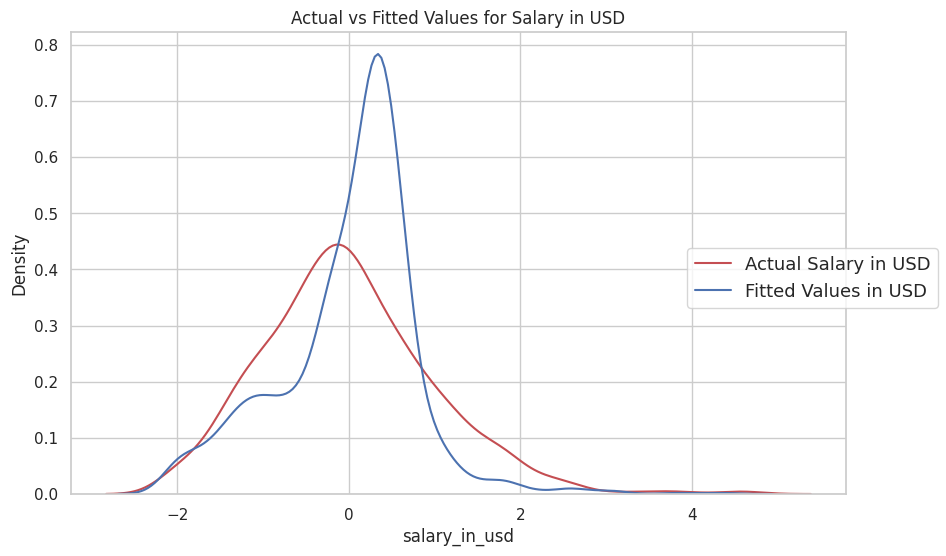

In [71]:
ax, fig = plt.subplots(figsize= (10,6))

sns.kdeplot(y_test, color="r", label='Actual Salary in USD')
sns.kdeplot(dt_y_pred, color="b", label='Fitted Values in USD')


plt.title('Actual vs Fitted Values for Salary in USD')
ax.legend(loc='center right', fontsize=13)

plt.show()

In [72]:
from sklearn import metrics
models = [LinearRegression(), RandomForestRegressor(350), DecisionTreeRegressor()]

results = {'Model_Name': [], 'Mean_Absolute_Error_MAE': [], 
            'Mean_Squared_Error_MSE': [], 'R2_score': []}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)

    results['Model_Name'].append(model.__class__.__name__)
    results['Mean_Absolute_Error_MAE'].append(mae)
    results['Mean_Squared_Error_MSE'].append(mse)
    results['R2_score'].append(r2)

Results = pd.DataFrame(results)

In [73]:
Results

,Model_Name,Mean_Absolute_Error_MAE,Mean_Squared_Error_MSE,R2_score
0,LinearRegression,0.654529,0.749598,0.248459
1,RandomForestRegressor,0.584617,0.640858,0.357481
2,DecisionTreeRegressor,0.622838,0.760104,0.237925
